In [168]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv
import math
import sys

csv.field_size_limit(sys.maxint)

9223372036854775807

In [171]:
# Load data from netlogo's behaviorspace "spreadsheet" output
# ** DIFFERENT THAN THE LOADERS IN OTHER NOTEBOOKS: needs to parse netlogo array
def loadBehaviorspaceAsStrings(filename):
    lines = []
    with open(filename, 'rb') as csvfile:
         reader = csv.reader(csvfile, delimiter=',', quotechar='"')
         for row in reader:
             lines.append(row)

    metadata = lines[0:5]
    
    _data = lines[6:]
    _data = np.array(lines[6:], dtype=object).T
    for i in range(1, len(_data)):
        for j in range(1, len(_data[i])):
            try:
                _data[i][j] = _data[i][j]
            except:
                continue
    data = {}
    for col in _data:
        data[col[0]] = np.array(col[1:], dtype=str)
            
    return (metadata, data)

def parseNetlogoArray(s):
    return eval(s.replace(' ', ', '))

In [192]:

metadata,data = loadBehaviorspaceAsStrings("./behaviorspace_data/mh.csv")

In [175]:
type(data['mutation-history'][0])

numpy.string_

In [193]:
out = data['mutation-history'][0]
data = eval(", ".join(out.split(" ")))
#data = [[data[i][0], math.floor(i/3), data[i][1]] for i in range(len(data))]

In [194]:
data[0]

[5643.9174172528055,
 0,
 [[0.4136006506328491,
   0.2470436600813808,
   0.0074582428209105656,
   0.3318974464648595],
  [0.22994341981148736,
   0.4068750406370588,
   0.17085987004912528,
   0.19232166950232854],
  [0.17219384908301416,
   0.08819201641020258,
   0.6549341211751987,
   0.08468001333158459],
  [0.12019096149729747,
   0.34262454879213944,
   0.41806998841533094,
   0.11911450129523216],
  [0.22621894766417516,
   0.21965997005850812,
   0.3655614147739362,
   0.1885596675033805],
  [0.09945494297535562,
   0.5401752474162349,
   0.2548237550767122,
   0.1055460545316973],
  [0.8418398870207899,
   0.011758319973258269,
   0.07719378184579062,
   0.06920801116016118],
  [0.20907289293041864,
   0.34194526120983737,
   0.3218784779175978,
   0.12710336794214616],
  [0.01842633203523636,
   0.7177759046425937,
   0.135105984790712,
   0.12869177853145797],
  [0.3207661884344064,
   0.1621934158364361,
   0.3173830638684667,
   0.1996573318606908],
  [0.1168774841312235

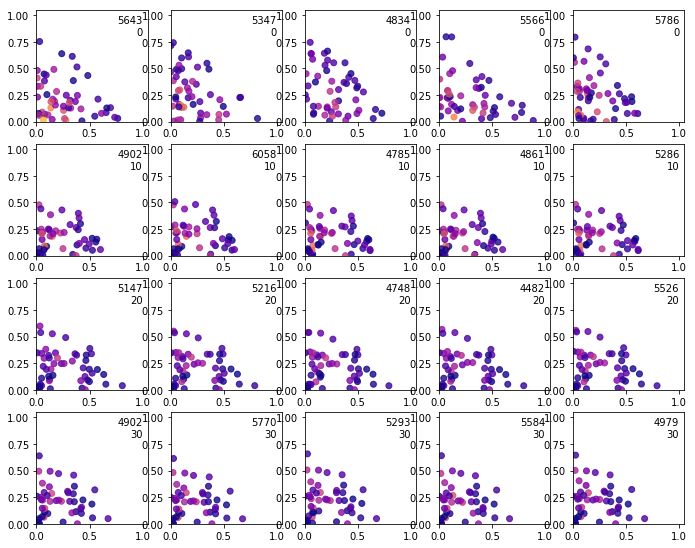

In [204]:
num_mutations = 5
num_generations = len(data) / num_mutations

generation_skip = 10

ncols = num_mutations
nrows = 1 + num_generations / generation_skip

size = (2,2)
plt.figure(figsize=(size[0]*ncols, size[1]*nrows))
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1)
subplot_index = 0

for i in range(len(data)):
    fitness = data[i][0]
    generation = data[i][1]
    population = data[i][2]
    
    if generation % generation_skip != 0: continue

    B = np.array([params[0] for params in population])
    X = np.array([params[1] for params in population])
    R = np.array([params[2] for params in population])
    H = np.array([params[3] for params in population])
    

    subplot_index += 1
    plt.subplot(nrows, ncols, subplot_index)
    plt.scatter(R, H, c=plt.cm.plasma((X)), alpha=0.8)
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    
    label = str(int(fitness)) + "\n" + str(generation)
    plt.text(1, 1, label, va="top", ha="right")

plt.show()

In [101]:
xb = [(h+x+b) for x,b,r,h in data[15][1]]
#filter(lambda i: i[0] < 0.1, xb)
xb.sort()
xb

[0.40947460513849593,
 0.4407893919618363,
 0.4674769759153173,
 0.4836988653231148,
 0.5103218936999308,
 0.5805504479946535,
 0.6094516832524797,
 0.6569666857686156,
 0.6638008435993967,
 0.6746502815517563,
 0.6868075675661252,
 0.6911409950719942,
 0.6948059838910624,
 0.7171337222438351,
 0.718336965327166,
 0.7347095101740231,
 0.764840850757379,
 0.7748262123974802,
 0.7974662717075165,
 0.8074224932371471,
 0.8168523803618738,
 0.8240634710681656,
 0.8496615409187709,
 0.8568180216924524,
 0.8660486347950396,
 0.8757388874142074,
 0.8772992372662363,
 0.8830652225457831,
 0.891332837535691,
 0.9004113647398007,
 0.9004113647398007,
 0.9004113647398008,
 0.9004113647398008,
 0.9004113647398008,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.9004113647398009,
 0.900411364739801,
 0.9004113647398

In [97]:
0.08829910607658942 +0.8121122586632114

0.9004113647398008

In [ ]:
[[5665.081368768124 0 [[0.4136006506328491 0.2470436600813808 0.0074582428209105656 0.3318974464648595] [0.22994341981148736 0.4068750406370588 0.17085987004912528 0.19232166950232854] [0.17219384908301416 0.08819201641020258 0.6549341211751987 0.08468001333158459] [0.12019096149729747 0.34262454879213944 0.41806998841533094 0.11911450129523216] [0.22621894766417516 0.21965997005850812 0.3655614147739362 0.1885596675033805] [0.09945494297535562 0.5401752474162349 0.2548237550767122 0.1055460545316973] [0.8418398870207899 0.011758319973258269 0.07719378184579062 0.06920801116016118] [0.20907289293041864 0.34194526120983737 0.3218784779175978 0.12710336794214616] [0.01842633203523636 0.7177759046425937 0.135105984790712 0.12869177853145797] [0.3207661884344064 0.1621934158364361 0.3173830638684667 0.1996573318606908] [0.11687748413122356 0.09376641079925807 0.5781741819296031 0.21118192313991524] [0.04351540034477641 0.6662198003113592 0.2771772615120889 0.01308753783177552] [0.5424922567454272 0.023469187957920523 0.42753937292056177 0.006499182376090484] [0.1613079321906855 0.044167181773809516 0.7642391977444982 0.03028568829100675] [0.2948736660117466 0.1770176997409153 0.28031856431493973 0.24779006993239838] [0.4740967464176241 0.006977793094403162 0.07173996513086978 0.44718549535710295] [0.3692352989281912 0.296921274555048 0.1781857997147972 0.1556576268019636] [0.3783566730159248 0.2238447350824906 0.25351515061325014 0.14428344128833448] [0.11695135109193833 0.007159562532303987 0.23761985722889978 0.6382692291468579] [0.0665668601697248 0.017685422541512286 0.4827993454430459 0.432948371845717] [0.1232170641908319 0.24575705959912197 0.3847940775388251 0.24623179867122102] [0.050060785578960765 0.1738170559186869 0.7355806714567722 0.04054148704558014] [0.3171817634539311 0.3198894201680923 0.15271272978248307 0.2102160865954935] [0.027472952628000535 0.2838130853496659 0.61108482751299 0.07762913450934361] [0.16947295764283798 0.04797947434139982 0.0299805593793131 0.7525670086364491] [0.37468323909564927 0.4824226221613769 0.05402550898648861 0.08886862975648524] [0.35226220286990495 0.04927189980344571 0.5480026964773247 0.05046320084932465] [0.45254955597768876 0.11627123555404661 0.3020106584233069 0.12916855004495775] [0.008664258706300276 0.3369891506810314 0.16388323001218674 0.49046336060048157] [0.40407192948002235 0.1387457936738954 0.07508810432903412 0.38209417251704814] [0.1263966153673235 0.4014805541318913 0.1890464575505112 0.283076372950274] [0.21496166594418942 0.4923426356300957 0.263992012711432 0.028703685714282834] [0.8763090603034858 0.027249963901752494 0.019757943335425687 0.07668303245933605] [7.758980247463132E-5 0.513607156780339 0.3089797851547793 0.1773354682624071] [0.25568130016231605 0.012575285592893226 0.3464886179698079 0.3852547962749828] [0.009052131068027935 0.04141706075440821 0.3364631006938955 0.6130677074836683] [0.05259012328356749 0.12068531823411888 0.6959078148624152 0.13081674361989848] [0.1924208504214454 0.4365381265801077 0.03927092717934255 0.3317700958191043] [0.01010044218416195 0.09562609154357538 0.3808096815552572 0.5134637847170055] [0.20231290089474885 0.008824304603737732 0.6608615368565857 0.12800125764492776] [0.20320391987697606 0.30831792706322747 0.007456370985998717 0.48102178207379775] [0.542005332289737 0.37409913409280804 0.0246166028762691 0.05927893074118584] [0.44419188397209497 0.38509026871991303 0.10794365156469832 0.06277419574329368] [0.07232967122714618 0.8460875038153708 0.06544554382669632 0.016137281130786718] [0.6374950473939754 0.010231768692277488 0.09831565247363705 0.25395753144011] [0.33923821840752877 0.1314661760347896 0.09154916988733053 0.4377464356703511] [0.09723964885561875 0.48602615618685274 0.006514094244529645 0.41022010071299886] [0.559985311251255 0.27221095668602 0.1477484453036224 0.02005528675910262] [0.49920250226506935 0.2596888467609155 0.010357625325441044 0.23075102564857408] [0.1323946097391866 0.5442443156691624 0.13646073345094645 0.18690034114070453]]] [4739.25332672106 0 [[0.4589455370985751 0.29897228074361604 0.08135089735354628 0.16073128480426258] [0.03997768273003577 0.2909797375013021 0.463427835755184 0.20561474401347812] [0.34972056092669357 0.011506263024754992 0.4959426984651131 0.14283047758343836] [0.1342259584885237 0.012077587214170737 0.36088262600631804 0.4928138282909875] [0.13964993705113893 0.39067190511986116 0.4528367499963606 0.01684140783263932] [0.5676232750849599 0.3195356603115982 0.09508744140896597 0.01775362319447593] [0.4786539414577027 0.1581630089022774 0.28345489202565144 0.07972815761436847] [0.5389100586443208 0.07086990467805743 0.16617357287026224 0.22404646380735949] [0.5095520453638726 0.40704262504055 0.06855818007183534 0.01484714952374211] [0.019571050913236743 0.1030122513074041 0.6513398420719538 0.22607685570740532] [0.20271545607944808 0.32073246711516523 0.15848461410780612 0.31806746269758057] [0.4208639486355823 0.4143267550706552 0.019531405766360477 0.14527789052740203] [0.1919128278833755 0.3982585580869913 0.026228117587070665 0.38360049644256256] [0.25074353366013247 0.15624104268218653 0.2421499604624625 0.3508654631952185] [0.3435131041658086 0.05496295374152693 0.10456925279762685 0.4969546892950376] [0.4064393056127279 0.13005767000188784 0.27592617295753186 0.1875768514278524] [0.5619041718550823 0.17655222300922813 0.049244722240281535 0.212298882895408] [0.44273230254738527 0.010517209304029218 0.05600302638959587 0.49074746175898964] [0.7195783315099648 1.493143716457812E-5 0.04918262021958064 0.23122411683329003] [0.3495794555630276 0.1426561378798663 0.13444873469092433 0.37331567186618175] [0.23687866234570054 0.06102227207771316 0.1040339838773281 0.5980650816992582] [0.04777282867817023 0.18656036520263852 0.2536895356663602 0.511977270452831] [0.2723229309058688 0.29182403532570755 0.20142117058071285 0.2344318631877108] [0.27748955136890374 0.3166679449174643 0.3411972598007802 0.06464524391285176] [0.23210498152563785 0.5305670587296787 0.10392437270346744 0.13340358704121602] [0.21372737956822918 0.1577180277216731 0.37493263638488605 0.2536219563252117] [0.003542970937172818 0.7446787262759469 0.09881558591151995 0.15296271687536034] [0.38684564271920474 0.2925353768279957 0.2831916496858554 0.037427330766944156] [0.1389949156426954 0.04811971185360375 0.16650500244330269 0.6463803700603982] [0.35605816313161276 0.1677257700798609 0.05406569560764474 0.4221503711808816] [0.2550566571369892 0.2761742580787535 0.0016872202919717694 0.4670818644922855] [0.6765519615934651 0.045261654472419255 0.27452044890718863 0.0036659350269270252] [0.13319649361159303 0.6066168501788952 0.12536381267937247 0.1348228435301393] [0.2245143165441731 0.3158248525017914 0.17295707122051007 0.28670375973352547] [0.028635965059132573 0.386237994149067 0.2068215878153551 0.3783044529764453] [0.16862298321091462 0.06358899748524083 0.026350269012959893 0.7414377502908847] [0.6210110600324986 0.004798425148476837 0.2125910745165972 0.16159944030242734] [0.09169655099869911 0.13027308097752566 0.16957617051778073 0.6084541975059945] [0.023905274736860327 0.5907056771297309 0.08755479398392296 0.29783425414948583] [0.02895933736967915 0.08512251429728479 0.6580859515512654 0.2278321967817707] [0.11566590528810239 0.03738000850056333 0.8175322128586813 0.029421873352653005] [0.13641891629448621 0.4979528147133703 0.07401114237599671 0.2916171266161468] [0.06998471784270577 0.32024410308397944 0.08005741830231816 0.5297137607709966] [0.7189045252511076 0.06444576230295829 0.0781877326126692 0.13846197983326491] [0.19927080272766973 0.08289317962709664 0.003764348733619638 0.714071668911614] [0.055284471186160644 0.054022786099131914 0.34254401144927427 0.5481487312654332] [0.630574381820781 0.3300260348670552 0.03468635511395435 0.004713228198209518] [0.3407374799594942 0.1046638364577589 0.07486150728514984 0.47973717629759705] [0.10632179873107894 0.29786031880926334 0.5255045528199506 0.07031332963970716] [0.03494944438166492 0.4428870056532288 0.45530480675013774 0.06685874321496854]]] [5083.30184887905 0 [[0.04000415768659171 0.43630140660360206 0.23960235864485024 0.284092077064956] [0.28368090163752147 0.36566473264617383 0.2128778133309437 0.13777655238536102] [0.8045396079740698 0.04239810466069582 0.08362054855372092 0.0694417388115135] [0.7082269108132402 0.05026235442024496 0.2354596178256837 0.006051116940831158] [0.03333724167561969 0.2676596243320897 0.06153437946014695 0.6374687545321437] [0.15775964901801653 0.03495686044451751 0.4906135492064928 0.31666994133097315] [0.024354856709417172 0.14411153225206186 0.5530734438904453 0.27846016714807564] [0.15524101131823287 0.29438659228676456 0.12358136054378022 0.42679103585122236] [0.061241783044722164 0.14491774413310643 0.21631082729694073 0.5775296455252307] [0.08955133410292881 0.20827987893105848 0.06223204801274296 0.6399367389532697] [0.18746584254187992 0.007700281267351783 0.726140031887654 0.07869384430311432] [0.4263081512851342 0.23535779586642758 0.21139961352454906 0.12693443932388915] [0.6538910283620044 0.0885359267819168 0.006458762605972557 0.25111428225010624] [0.10317755876195256 0.280333159609234 0.5102457726030245 0.10624350902578894] [0.37038882998364864 0.3784599968512655 0.19034375485585098 0.06080741830923486] [0.3551461278363601 0.18579560151434016 0.408213021086796 0.05084524956250369] [0.017494581126889175 0.15392172830862805 0.18624441560806082 0.642339274956422] [0.014561507959113817 0.12608616469767708 0.4722703113141421 0.387082016029067] [0.21882516995359858 0.3170933065401672 0.014451246633002457 0.44963027687323176] [0.17456177651423732 0.07413442008327231 0.3938410423623393 0.35746276104015107] [0.47717435636559213 0.15480328714274738 0.03272013229752746 0.335302224194133] [0.1747730100794047 0.256904574055527 0.4924486910396769 0.07587372482539134] [0.15277453160581866 0.10820296133115048 0.37029416697312756 0.3687283400899033] [0.2765923358587381 0.049683903901519 0.6450335985597555 0.02869016167998739] [0.28771627383313414 0.02531009141170215 0.20781805158060618 0.47915558317455753] [0.04710533616927848 0.12140223039557496 0.41510694042928864 0.4163854930058579] [0.15964511942099313 0.060120064660984296 0.6662621430339013 0.11397267288412127] [0.4804357542979095 0.1760374383146709 0.25124766164005174 0.09227914574736784] [0.6203391358334105 0.1494958355157866 0.0183018360990006 0.2118631925518023] [0.7628091187551169 0.06949727902420555 0.08594518895682324 0.08174841326385429] [0.21353214432160084 0.16615827334501532 0.3192259202191684 0.30108366211421544] [0.4453381398239675 0.040546547550220025 0.3193693795223108 0.19474593310350163] [0.03905287768918764 0.13455070463490226 0.2736074212887061 0.552788996387204] [0.09447497809848826 0.44041579333412895 0.28512367172809006 0.17998555683929274] [0.11244565743474577 0.05552213611298007 0.4989898762245949 0.33304233022767926] [0.06405396876503688 0.24963105248090567 0.4816831373366688 0.20463184141738866] [0.005113167859391421 0.06245693138142594 0.37985318227093745 0.5525767184882452] [0.03184822583881797 0.33300386767692414 0.2557318563302674 0.3794160501539905] [0.10946083214918056 0.45965066496352114 0.29288624486211234 0.13800225802518595] [0.37313639592693915 0.3529096962675373 0.13006033541612072 0.1438935723894028] [0.22016747864400188 0.4667433176994028 0.2620285815719383 0.051060622084657004] [0.37197993176566846 0.238305997541305 0.31784566673179504 0.07186840396123151] [0.2936627863664407 0.3065365651902311 0.3867977566831571 0.01300289176017111] [0.11754994522578466 0.2206711805491962 0.07563833774629503 0.5861405364787241] [0.07329337011926684 0.12946115547519854 0.05258017008226901 0.7446653043232656] [0.6644431141979336 0.10899619335449184 0.08274060218432144 0.14382009026325315] [0.09970430808607411 0.013006953761797946 0.4359929664806277 0.45129577167150026] [0.1494278817339404 0.12918790955732506 0.1922192132228342 0.5291649954859003] [0.10214484258805112 0.019457251236211448 0.2159085596141025 0.6624893465616349] [0.5220173894890356 0.004061017919160914 0.10201539689713068 0.37190619569467276]]] [5483.256092075789 1 [[0.4125052821570732 0.24638939651342123 0.01008686284373123 0.3310184584857742] [0.2292144310005512 0.4055851261341051 0.17348849007194594 0.1917119527933977] [0.17088212217148144 0.08752019310220609 0.6575627411980194 0.08403494352829308] [0.11964805021644852 0.3410768888822949 0.4206986084381516 0.11857645246310486] [0.22528167230101362 0.21874986999688872 0.3681900347967569 0.18777842290534083] [0.09910411422007182 0.5382697713884308 0.25745237509953284 0.1051737392919646] [0.8394419001634211 0.01172482631585936 0.07982240186861128 0.06901087165210815] [0.20826245825950848 0.3406197699357002 0.3245070979404185 0.12661067386437277] [0.018370329999746214 0.7155944117872116 0.13773460481353267 0.12830065339950947] [0.3195309825950364 0.1615688417336406 0.32001168389128737 0.1988884917800356] [0.11614915864273255 0.09318210264566415 0.5808028019524238 0.20986593675917947] [0.04335715206818425 0.663797022756849 0.27980588153490954 0.013039943640057098] [0.5400012452402669 0.023361422332710165 0.4301679929433824 0.006469339483640549] [0.1595094260084037 0.043674738851782226 0.7668678177673189 0.02994801737249515] [0.2937966466747906 0.17637114663163617 0.2829471843377604 0.24688502235581272] [0.47275421291022907 0.006958033580954289 0.07436858515369044 0.4459191683551262] [0.3680542785715729 0.2959715547677458 0.18081441973761786 0.1551597469230635] [0.3770243540448506 0.22305650374313496 0.2561437706360708 0.14377537157594375] [0.11654811306679935 0.007134876987165515 0.24024847725172044 0.6360685326943147] [0.06622854083474959 0.017595538169953462 0.4854279654658666 0.4307479555294303] [0.12269058869659502 0.24470700155509761 0.38742269756164577 0.2451797121866616] [0.049563126107333 0.1720891225031805 0.7382092914795929 0.040138459909893585] [0.3161977402500011 0.31889699674276867 0.15534134980530373 0.20956391320192644] [0.027287267012028896 0.28189483476016597 0.6137134475358107 0.07710445069199443] [0.16901370910499264 0.04784945652767692 0.03260917940213376 0.7505276549651967] [0.3736420906568083 0.48108209366285853 0.05665412900930927 0.08862168667102398] [0.3502135988792833 0.048985355832107044 0.5506313165001454 0.050169728788464214] [0.45084525943144865 0.11583335938653226 0.30463927844612754 0.1286821027358915] [0.008637019635472155 0.33592970963075036 0.1665118500350074 0.4889214206987701] [0.40292354813747244 0.13835147506577675 0.07771672435185478 0.38100825244489595] [0.12598691412479887 0.4001791974349632 0.19167507757333185 0.2821588108669061] [0.21419393984746402 0.49058425564990926 0.2666206327342527 0.028601171768374078] [0.8739591473136974 0.027176890317277838 0.02238656335824635 0.07647739901077837] [7.729465320986313E-5 0.5116534106710746 0.31160840517759997 0.17666088949811543] [0.2546528728027503 0.012524703998737242 0.34911723799262856 0.38370518520588387] [0.009016270797107814 0.041252985907479174 0.33909172071671617 0.610639022578697] [0.05213552609948251 0.11964209562112353 0.6985364348852359 0.1296859433941581] [0.19189437390008754 0.43534372860390813 0.04189954720216321 0.3308623502938411] [0.010057563244078848 0.0952201345196237 0.38343830157807784 0.5112840006582197] [0.20074479877729015 0.00875590851691863 0.6634901568794064 0.12700913582638484] [0.20266576127428076 0.3075013879683384 0.01008499100881938 0.4797478597485613] [0.5405446491643796 0.37309095159011624 0.027245222899089764 0.05911917634641433] [0.4428829849521715 0.38395552426937907 0.11057227158751898 0.06258921919093045] [0.07212622966119375 0.8437077146667596 0.06807416384951698 0.016091891822529646] [0.6356366007539446 0.010201940701886866 0.10094427249645771 0.2532171860477109] [0.33825662607049334 0.13108577611528505 0.09417778991015119 0.43647980790407037] [0.09698236680811999 0.4847402012695599 0.009142714267350308 0.4091347176549697] [0.5582581350513066 0.2713713698677467 0.15037706532644307 0.019993429754503585] [0.49787655490622906 0.2589990791036611 0.012986245348261708 0.23013812064184808] [0.13199159955128312 0.5425876318785209 0.1390893534737671 0.18633141509642884]]] [5396.241317552362 1 [[0.49736631773915596 0.2117540967259072 0.006392851657007282 0.28448673387792955] [0.3137090869177942 0.3626157484178747 0.15227397472068305 0.171401189943648] [0.255959516189321 0.07926787024401662 0.5886613669680064 0.076111246598656] [0.2039566286036043 0.3100036360251893 0.37826599693061674 0.10777373844058967] [0.309984614770482 0.19588068020260113 0.325987564155048 0.16814714087186894] [0.18322061008166246 0.48992996584905507 0.23112090792649922 0.09572851614278322] [0.9256055541270968 0.005530811039075474 0.03630996789946813 0.03255366693435962] [0.2928385600367255 0.3057304537224484 0.2877889073504353 0.11364207889039085] [0.10219199914154319 0.6565222469218386 0.1235762918951047 0.11770946204151353] [0.40453185554071325 0.1421911140569145 0.27824219128453714 0.17503483911783507] [0.2006431512375304 0.08487250784510561 0.5233333810410288 0.19115095987633524] [0.12728106745108325 0.6078745367988807 0.25290301995542547 0.011941375794610598] [0.6262579238517341 0.019172184869505875 0.34926065236353 0.005309238915230097] [0.24507359929699235 0.03975591620031677 0.6879096261592192 0.02726085834347154] [0.3786393331180534 0.1559888358427919 0.24701804721566734 0.21835378382348739] [0.557862413523931 0.005866372905421753 0.06031325119359003 0.37595796237705725] [0.453000966034498 0.2574900752522085 0.15452269308150204 0.13498626563179147] [0.46212234012223163 0.1936819347297737 0.21935429857659863 0.12484142657139599] [0.20071701819824517 0.00648040908764456 0.21507932576090302 0.5777232469532072] [0.15033252727603164 0.016098344523780818 0.4394732543457462 0.39409587385444134] [0.20698273129713873 0.22227803964715817 0.3480318057299551 0.222707423325748] [0.1338264526852676 0.15848986295470668 0.6707171468020552 0.03696653755797059] [0.40094743056023796 0.28064654520304727 0.13397848543868573 0.18442753879802906] [0.11123861973430736 0.2593677061778923 0.5584508895947695 0.07094278449303083] [0.2532386247491448 0.04314033910480275 0.02695676674096524 0.6766642694050872] [0.4584489062019561 0.4177986502817829 0.0467884043957431 0.07696403912051789] [0.4360278699762118 0.042900041352514844 0.47713480571988826 0.0439372829513851] [0.5363152230839956 0.09848051546639915 0.25579985605338085 0.10940440539622438] [0.0924299258126071 0.3085143163352562 0.15003546127180792 0.4490202965803287] [0.4878375965863292 0.1192432151913162 0.06453346617382634 0.3283857220485283] [0.21016228247363034 0.36298449626553114 0.17091969326666964 0.25593352799416885] [0.29872733305049626 0.43980837388855337 0.23582336654957767 0.025640926511372703] [0.9600747274097926 0.008795811880160207 0.006377518639798745 0.02475194207024844] [0.08384325690878146 0.47058117228442203 0.28309587900176014 0.16247969180503632] [0.3394469672686229 0.011160062265881902 0.30749476999136455 0.34189820047413066] [0.09281779817433476 0.03791604134415948 0.3080215883097406 0.5612445721717653] [0.13635579038987433 0.11001487195710197 0.634378814807574 0.11925052284544976] [0.27618651752775225 0.39125846896462435 0.035197573608020755 0.2973574398996026] [0.09386610929046878 0.08753417627028198 0.3485854253020274 0.47001428913722176] [0.2860785680010557 0.007897658350199895 0.5914640154954098 0.11455975815333463] [0.2869695869832829 0.27590504566790564 0.006672496786042991 0.43045287056276843] [0.6257709993960439 0.3056776747604473 0.020114309930085294 0.04843701591342348] [0.5279575510784018 0.3270534349183516 0.09167549764167475 0.0533135163615718] [0.15609533833345302 0.7696885051741646 0.059536020294742774 0.014680136197639512] [0.7212607145002823 0.007867467393703162 0.0755974077786564 0.19527441032735818] [0.4230038855138356 0.11480003061861713 0.07994335747160797 0.38225272639593927] [0.1810053159619256 0.440928578349615 0.005909662016979245 0.37215644367148015] [0.6437509783575618 0.2203901130562504 0.11962154999480548 0.016237358591382322] [0.5829681693713762 0.21625210918258736 0.008625161806859388 0.19215455963917707] [0.21616027684549344 0.4916985515665003 0.123285706532432 0.16885546505557428]]] [4766.6680404492745 1 [[0.4205263196781648 0.2511803620591199 0.007583129765256986 0.32071018849745836] [0.23312839612966155 0.41251071992697974 0.1732264724084314 0.18113441153492738] [0.17429844314645537 0.08926992015164424 0.6629388813377171 0.07349275536418344] [0.12171738836389627 0.34697588528131773 0.42337948302695494 0.107927243327831] [0.22933780880932744 0.22268840314439542 0.37060137851029784 0.17737240953597933] [0.10069886180296607 0.5469314139813969 0.25801092765134087 0.09435879656429615] [0.8519580230772552 0.011899644093342331 0.0781215796366424 0.058020753192760025] [0.21175242255775764 0.34632771579540084 0.32600375167209655 0.11591610997474501] [0.018662918956823923 0.726991867501853 0.13684069297726623 0.11750452056405682] [0.3252498855307745 0.16446056921436938 0.32181947136156647 0.18847007389328962] [0.1185350761716615 0.09509623456605629 0.5863740240897681 0.19999466517251407] [0.0440086740928272 0.6737718102968236 0.2803192357459749 0.0019002798643743685] [0.5460410772915821 0.023622716299368768 0.4303362064090491 0] [0.16316888590438794 0.04467672324414824 0.7730559605278582 0.0190984303236056] [0.2992591807963895 0.17965039919440376 0.2844876080442095 0.23660281196499722] [0.4836910001123706 0.007119002072703514 0.07319176042522416 0.4359982373897018] [0.3741275448593466 0.30085538351356855 0.1805467027925225 0.14447036883456243] [0.38330313999920895 0.2267711816616974 0.2568294950181603 0.13309618332093331] [0.12056830889515713 0.007380986528923679 0.2449687333964625 0.6270819711794567] [0.06788014559176403 0.018034335011578518 0.49232440551834156 0.42176111387831583] [0.1250458241208192 0.2494045305566374 0.3905051046187235 0.23504454070381986] [0.0506444928625598 0.17584375766497587 0.7441575203942854 0.029354229078178987] [0.3216746306168217 0.3244206411814911 0.15487589957359485 0.19902882862809235] [0.027806166760921073 0.28725539941131156 0.618496557285825 0.06644187654194246] [0.1771353865097436 0.050148783913415984 0.03133607890779248 0.7413797506690479] [0.3792837590521778 0.4883460120255487 0.05468885713318942 0.07768137178908409] [0.35641248766054767 0.04985241174794131 0.5544591577095875 0.0392759428819235] [0.4583632971167078 0.11776493023675327 0.30589048056898227 0.1179812920775566] [0.008854488985633893 0.34438799949654936 0.16748140888473634 0.4792761026330804] [0.41138769947509213 0.14125780265112825 0.07644758332413262 0.37090691454964697] [0.12836897544721043 0.4077454704472481 0.19199643912266856 0.2718891149828728] [0.21743756498205252 0.4980133707004688 0.2670326365705971 0.017516427746881683] [0.8869267526685448 0.027580134781838534 0.01999733805768174 0.0654957744919349] [7.864493139101966E-5 0.5205916024871072 0.3131815422864959 0.16614821029500593] [0.2603342403479801 0.012804133192010679 0.3527940881524276 0.37406753830758166] [0.009313852633716282 0.0426145398789802 0.34619115797103633 0.6018804495162672] [0.053267010776960964 0.12223865900322888 0.7048648445673129 0.11962948565249733] [0.19564228914860043 0.4438464864785532 0.03992838652114328 0.32058283785170316] [0.010332688518041365 0.09782488727739357 0.38956589745496073 0.5022765267496043] [0.20490846267999877 0.008937515514705698 0.6693400221277689 0.1168139996775266] [0.20758424759233715 0.3149641254331968 0.007617102868069488 0.4698345241063966] [0.548450976668479 0.37854800172769054 0.024909348830045676 0.04809167277378469] [0.44949400985302157 0.3896869242508842 0.10923212812020167 0.05158693777589253] [0.07315211390659378 0.8557081541222102 0.06618970880781035 0.004950023163385567] [0.6470545856893004 0.010385198879762985 0.09978994195822777 0.24277027347270885] [0.34598810084936155 0.13408198164029514 0.09337073980739335 0.42655917770294993] [0.09908414209406657 0.49524535812089626 0.006637657039439434 0.3990328427455977] [0.5663782230658454 0.27531857505759944 0.14943517308485363 0.008868028791701468] [0.5064624497684379 0.2634655253355223 0.010508257214866822 0.21956376768117292] [0.13421619782683084 0.5517324525664579 0.13833826643340794 0.17571308317330336]]]
[[5665.081368768124 0 [[0.4136006506328491 0.2470436600813808 0.0074582428209105656 0.3318974464648595] [0.22994341981148736 0.4068750406370588 0.17085987004912528 0.19232166950232854] [0.17219384908301416 0.08819201641020258 0.6549341211751987 0.08468001333158459] [0.12019096149729747 0.34262454879213944 0.41806998841533094 0.11911450129523216] [0.22621894766417516 0.21965997005850812 0.3655614147739362 0.1885596675033805] [0.09945494297535562 0.5401752474162349 0.2548237550767122 0.1055460545316973] [0.8418398870207899 0.011758319973258269 0.07719378184579062 0.06920801116016118] [0.20907289293041864 0.34194526120983737 0.3218784779175978 0.12710336794214616] [0.01842633203523636 0.7177759046425937 0.135105984790712 0.12869177853145797] [0.3207661884344064 0.1621934158364361 0.3173830638684667 0.1996573318606908] [0.11687748413122356 0.09376641079925807 0.5781741819296031 0.21118192313991524] [0.04351540034477641 0.6662198003113592 0.2771772615120889 0.01308753783177552] [0.5424922567454272 0.023469187957920523 0.42753937292056177 0.006499182376090484] [0.1613079321906855 0.044167181773809516 0.7642391977444982 0.03028568829100675] [0.2948736660117466 0.1770176997409153 0.28031856431493973 0.24779006993239838] [0.4740967464176241 0.006977793094403162 0.07173996513086978 0.44718549535710295] [0.3692352989281912 0.296921274555048 0.1781857997147972 0.1556576268019636] [0.3783566730159248 0.2238447350824906 0.25351515061325014 0.14428344128833448] [0.11695135109193833 0.007159562532303987 0.23761985722889978 0.6382692291468579] [0.0665668601697248 0.017685422541512286 0.4827993454430459 0.432948371845717] [0.1232170641908319 0.24575705959912197 0.3847940775388251 0.24623179867122102] [0.050060785578960765 0.1738170559186869 0.7355806714567722 0.04054148704558014] [0.3171817634539311 0.3198894201680923 0.15271272978248307 0.2102160865954935] [0.027472952628000535 0.2838130853496659 0.61108482751299 0.07762913450934361] [0.16947295764283798 0.04797947434139982 0.0299805593793131 0.7525670086364491] [0.37468323909564927 0.4824226221613769 0.05402550898648861 0.08886862975648524] [0.35226220286990495 0.04927189980344571 0.5480026964773247 0.05046320084932465] [0.45254955597768876 0.11627123555404661 0.3020106584233069 0.12916855004495775] [0.008664258706300276 0.3369891506810314 0.16388323001218674 0.49046336060048157] [0.40407192948002235 0.1387457936738954 0.07508810432903412 0.38209417251704814] [0.1263966153673235 0.4014805541318913 0.1890464575505112 0.283076372950274] [0.21496166594418942 0.4923426356300957 0.263992012711432 0.028703685714282834] [0.8763090603034858 0.027249963901752494 0.019757943335425687 0.07668303245933605] [7.758980247463132E-5 0.513607156780339 0.3089797851547793 0.1773354682624071] [0.25568130016231605 0.012575285592893226 0.3464886179698079 0.3852547962749828] [0.009052131068027935 0.04141706075440821 0.3364631006938955 0.6130677074836683] [0.05259012328356749 0.12068531823411888 0.6959078148624152 0.13081674361989848] [0.1924208504214454 0.4365381265801077 0.03927092717934255 0.3317700958191043] [0.01010044218416195 0.09562609154357538 0.3808096815552572 0.5134637847170055] [0.20231290089474885 0.008824304603737732 0.6608615368565857 0.12800125764492776] [0.20320391987697606 0.30831792706322747 0.007456370985998717 0.48102178207379775] [0.542005332289737 0.37409913409280804 0.0246166028762691 0.05927893074118584] [0.44419188397209497 0.38509026871991303 0.10794365156469832 0.06277419574329368] [0.07232967122714618 0.8460875038153708 0.06544554382669632 0.016137281130786718] [0.6374950473939754 0.010231768692277488 0.09831565247363705 0.25395753144011] [0.33923821840752877 0.1314661760347896 0.09154916988733053 0.4377464356703511] [0.09723964885561875 0.48602615618685274 0.006514094244529645 0.41022010071299886] [0.559985311251255 0.27221095668602 0.1477484453036224 0.02005528675910262] [0.49920250226506935 0.2596888467609155 0.010357625325441044 0.23075102564857408] [0.1323946097391866 0.5442443156691624 0.13646073345094645 0.18690034114070453]]] [4739.25332672106 0 [[0.4589455370985751 0.29897228074361604 0.08135089735354628 0.16073128480426258] [0.03997768273003577 0.2909797375013021 0.463427835755184 0.20561474401347812] [0.34972056092669357 0.011506263024754992 0.4959426984651131 0.14283047758343836] [0.1342259584885237 0.012077587214170737 0.36088262600631804 0.4928138282909875] [0.13964993705113893 0.39067190511986116 0.4528367499963606 0.01684140783263932] [0.5676232750849599 0.3195356603115982 0.09508744140896597 0.01775362319447593] [0.4786539414577027 0.1581630089022774 0.28345489202565144 0.07972815761436847] [0.5389100586443208 0.07086990467805743 0.16617357287026224 0.22404646380735949] [0.5095520453638726 0.40704262504055 0.06855818007183534 0.01484714952374211] [0.019571050913236743 0.1030122513074041 0.6513398420719538 0.22607685570740532] [0.20271545607944808 0.32073246711516523 0.15848461410780612 0.31806746269758057] [0.4208639486355823 0.4143267550706552 0.019531405766360477 0.14527789052740203] [0.1919128278833755 0.3982585580869913 0.026228117587070665 0.38360049644256256] [0.25074353366013247 0.15624104268218653 0.2421499604624625 0.3508654631952185] [0.3435131041658086 0.05496295374152693 0.10456925279762685 0.4969546892950376] [0.4064393056127279 0.13005767000188784 0.27592617295753186 0.1875768514278524] [0.5619041718550823 0.17655222300922813 0.049244722240281535 0.212298882895408] [0.44273230254738527 0.010517209304029218 0.05600302638959587 0.49074746175898964] [0.7195783315099648 1.493143716457812E-5 0.04918262021958064 0.23122411683329003] [0.3495794555630276 0.1426561378798663 0.13444873469092433 0.37331567186618175] [0.23687866234570054 0.06102227207771316 0.1040339838773281 0.5980650816992582] [0.04777282867817023 0.18656036520263852 0.2536895356663602 0.511977270452831] [0.2723229309058688 0.29182403532570755 0.20142117058071285 0.2344318631877108] [0.27748955136890374 0.3166679449174643 0.3411972598007802 0.06464524391285176] [0.23210498152563785 0.5305670587296787 0.10392437270346744 0.13340358704121602] [0.21372737956822918 0.1577180277216731 0.37493263638488605 0.2536219563252117] [0.003542970937172818 0.7446787262759469 0.09881558591151995 0.15296271687536034] [0.38684564271920474 0.2925353768279957 0.2831916496858554 0.037427330766944156] [0.1389949156426954 0.04811971185360375 0.16650500244330269 0.6463803700603982] [0.35605816313161276 0.1677257700798609 0.05406569560764474 0.4221503711808816] [0.2550566571369892 0.2761742580787535 0.0016872202919717694 0.4670818644922855] [0.6765519615934651 0.045261654472419255 0.27452044890718863 0.0036659350269270252] [0.13319649361159303 0.6066168501788952 0.12536381267937247 0.1348228435301393] [0.2245143165441731 0.3158248525017914 0.17295707122051007 0.28670375973352547] [0.028635965059132573 0.386237994149067 0.2068215878153551 0.3783044529764453] [0.16862298321091462 0.06358899748524083 0.026350269012959893 0.7414377502908847] [0.6210110600324986 0.004798425148476837 0.2125910745165972 0.16159944030242734] [0.09169655099869911 0.13027308097752566 0.16957617051778073 0.6084541975059945] [0.023905274736860327 0.5907056771297309 0.08755479398392296 0.29783425414948583] [0.02895933736967915 0.08512251429728479 0.6580859515512654 0.2278321967817707] [0.11566590528810239 0.03738000850056333 0.8175322128586813 0.029421873352653005] [0.13641891629448621 0.4979528147133703 0.07401114237599671 0.2916171266161468] [0.06998471784270577 0.32024410308397944 0.08005741830231816 0.5297137607709966] [0.7189045252511076 0.06444576230295829 0.0781877326126692 0.13846197983326491] [0.19927080272766973 0.08289317962709664 0.003764348733619638 0.714071668911614] [0.055284471186160644 0.054022786099131914 0.34254401144927427 0.5481487312654332] [0.630574381820781 0.3300260348670552 0.03468635511395435 0.004713228198209518] [0.3407374799594942 0.1046638364577589 0.07486150728514984 0.47973717629759705] [0.10632179873107894 0.29786031880926334 0.5255045528199506 0.07031332963970716] [0.03494944438166492 0.4428870056532288 0.45530480675013774 0.06685874321496854]]] [5083.30184887905 0 [[0.04000415768659171 0.43630140660360206 0.23960235864485024 0.284092077064956] [0.28368090163752147 0.36566473264617383 0.2128778133309437 0.13777655238536102] [0.8045396079740698 0.04239810466069582 0.08362054855372092 0.0694417388115135] [0.7082269108132402 0.05026235442024496 0.2354596178256837 0.006051116940831158] [0.03333724167561969 0.2676596243320897 0.06153437946014695 0.6374687545321437] [0.15775964901801653 0.03495686044451751 0.4906135492064928 0.31666994133097315] [0.024354856709417172 0.14411153225206186 0.5530734438904453 0.27846016714807564] [0.15524101131823287 0.29438659228676456 0.12358136054378022 0.42679103585122236] [0.061241783044722164 0.14491774413310643 0.21631082729694073 0.5775296455252307] [0.08955133410292881 0.20827987893105848 0.06223204801274296 0.6399367389532697] [0.18746584254187992 0.007700281267351783 0.726140031887654 0.07869384430311432] [0.4263081512851342 0.23535779586642758 0.21139961352454906 0.12693443932388915] [0.6538910283620044 0.0885359267819168 0.006458762605972557 0.25111428225010624] [0.10317755876195256 0.280333159609234 0.5102457726030245 0.10624350902578894] [0.37038882998364864 0.3784599968512655 0.19034375485585098 0.06080741830923486] [0.3551461278363601 0.18579560151434016 0.408213021086796 0.05084524956250369] [0.017494581126889175 0.15392172830862805 0.18624441560806082 0.642339274956422] [0.014561507959113817 0.12608616469767708 0.4722703113141421 0.387082016029067] [0.21882516995359858 0.3170933065401672 0.014451246633002457 0.44963027687323176] [0.17456177651423732 0.07413442008327231 0.3938410423623393 0.35746276104015107] [0.47717435636559213 0.15480328714274738 0.03272013229752746 0.335302224194133] [0.1747730100794047 0.256904574055527 0.4924486910396769 0.07587372482539134] [0.15277453160581866 0.10820296133115048 0.37029416697312756 0.3687283400899033] [0.2765923358587381 0.049683903901519 0.6450335985597555 0.02869016167998739] [0.28771627383313414 0.02531009141170215 0.20781805158060618 0.47915558317455753] [0.04710533616927848 0.12140223039557496 0.41510694042928864 0.4163854930058579] [0.15964511942099313 0.060120064660984296 0.6662621430339013 0.11397267288412127] [0.4804357542979095 0.1760374383146709 0.25124766164005174 0.09227914574736784] [0.6203391358334105 0.1494958355157866 0.0183018360990006 0.2118631925518023] [0.7628091187551169 0.06949727902420555 0.08594518895682324 0.08174841326385429] [0.21353214432160084 0.16615827334501532 0.3192259202191684 0.30108366211421544] [0.4453381398239675 0.040546547550220025 0.3193693795223108 0.19474593310350163] [0.03905287768918764 0.13455070463490226 0.2736074212887061 0.552788996387204] [0.09447497809848826 0.44041579333412895 0.28512367172809006 0.17998555683929274] [0.11244565743474577 0.05552213611298007 0.4989898762245949 0.33304233022767926] [0.06405396876503688 0.24963105248090567 0.4816831373366688 0.20463184141738866] [0.005113167859391421 0.06245693138142594 0.37985318227093745 0.5525767184882452] [0.03184822583881797 0.33300386767692414 0.2557318563302674 0.3794160501539905] [0.10946083214918056 0.45965066496352114 0.29288624486211234 0.13800225802518595] [0.37313639592693915 0.3529096962675373 0.13006033541612072 0.1438935723894028] [0.22016747864400188 0.4667433176994028 0.2620285815719383 0.051060622084657004] [0.37197993176566846 0.238305997541305 0.31784566673179504 0.07186840396123151] [0.2936627863664407 0.3065365651902311 0.3867977566831571 0.01300289176017111] [0.11754994522578466 0.2206711805491962 0.07563833774629503 0.5861405364787241] [0.07329337011926684 0.12946115547519854 0.05258017008226901 0.7446653043232656] [0.6644431141979336 0.10899619335449184 0.08274060218432144 0.14382009026325315] [0.09970430808607411 0.013006953761797946 0.4359929664806277 0.45129577167150026] [0.1494278817339404 0.12918790955732506 0.1922192132228342 0.5291649954859003] [0.10214484258805112 0.019457251236211448 0.2159085596141025 0.6624893465616349] [0.5220173894890356 0.004061017919160914 0.10201539689713068 0.37190619569467276]]] [5483.256092075789 1 [[0.4125052821570732 0.24638939651342123 0.01008686284373123 0.3310184584857742] [0.2292144310005512 0.4055851261341051 0.17348849007194594 0.1917119527933977] [0.17088212217148144 0.08752019310220609 0.6575627411980194 0.08403494352829308] [0.11964805021644852 0.3410768888822949 0.4206986084381516 0.11857645246310486] [0.22528167230101362 0.21874986999688872 0.3681900347967569 0.18777842290534083] [0.09910411422007182 0.5382697713884308 0.25745237509953284 0.1051737392919646] [0.8394419001634211 0.01172482631585936 0.07982240186861128 0.06901087165210815] [0.20826245825950848 0.3406197699357002 0.3245070979404185 0.12661067386437277] [0.018370329999746214 0.7155944117872116 0.13773460481353267 0.12830065339950947] [0.3195309825950364 0.1615688417336406 0.32001168389128737 0.1988884917800356] [0.11614915864273255 0.09318210264566415 0.5808028019524238 0.20986593675917947] [0.04335715206818425 0.663797022756849 0.27980588153490954 0.013039943640057098] [0.5400012452402669 0.023361422332710165 0.4301679929433824 0.006469339483640549] [0.1595094260084037 0.043674738851782226 0.7668678177673189 0.02994801737249515] [0.2937966466747906 0.17637114663163617 0.2829471843377604 0.24688502235581272] [0.47275421291022907 0.006958033580954289 0.07436858515369044 0.4459191683551262] [0.3680542785715729 0.2959715547677458 0.18081441973761786 0.1551597469230635] [0.3770243540448506 0.22305650374313496 0.2561437706360708 0.14377537157594375] [0.11654811306679935 0.007134876987165515 0.24024847725172044 0.6360685326943147] [0.06622854083474959 0.017595538169953462 0.4854279654658666 0.4307479555294303] [0.12269058869659502 0.24470700155509761 0.38742269756164577 0.2451797121866616] [0.049563126107333 0.1720891225031805 0.7382092914795929 0.040138459909893585] [0.3161977402500011 0.31889699674276867 0.15534134980530373 0.20956391320192644] [0.027287267012028896 0.28189483476016597 0.6137134475358107 0.07710445069199443] [0.16901370910499264 0.04784945652767692 0.03260917940213376 0.7505276549651967] [0.3736420906568083 0.48108209366285853 0.05665412900930927 0.08862168667102398] [0.3502135988792833 0.048985355832107044 0.5506313165001454 0.050169728788464214] [0.45084525943144865 0.11583335938653226 0.30463927844612754 0.1286821027358915] [0.008637019635472155 0.33592970963075036 0.1665118500350074 0.4889214206987701] [0.40292354813747244 0.13835147506577675 0.07771672435185478 0.38100825244489595] [0.12598691412479887 0.4001791974349632 0.19167507757333185 0.2821588108669061] [0.21419393984746402 0.49058425564990926 0.2666206327342527 0.028601171768374078] [0.8739591473136974 0.027176890317277838 0.02238656335824635 0.07647739901077837] [7.729465320986313E-5 0.5116534106710746 0.31160840517759997 0.17666088949811543] [0.2546528728027503 0.012524703998737242 0.34911723799262856 0.38370518520588387] [0.009016270797107814 0.041252985907479174 0.33909172071671617 0.610639022578697] [0.05213552609948251 0.11964209562112353 0.6985364348852359 0.1296859433941581] [0.19189437390008754 0.43534372860390813 0.04189954720216321 0.3308623502938411] [0.010057563244078848 0.0952201345196237 0.38343830157807784 0.5112840006582197] [0.20074479877729015 0.00875590851691863 0.6634901568794064 0.12700913582638484] [0.20266576127428076 0.3075013879683384 0.01008499100881938 0.4797478597485613] [0.5405446491643796 0.37309095159011624 0.027245222899089764 0.05911917634641433] [0.4428829849521715 0.38395552426937907 0.11057227158751898 0.06258921919093045] [0.07212622966119375 0.8437077146667596 0.06807416384951698 0.016091891822529646] [0.6356366007539446 0.010201940701886866 0.10094427249645771 0.2532171860477109] [0.33825662607049334 0.13108577611528505 0.09417778991015119 0.43647980790407037] [0.09698236680811999 0.4847402012695599 0.009142714267350308 0.4091347176549697] [0.5582581350513066 0.2713713698677467 0.15037706532644307 0.019993429754503585] [0.49787655490622906 0.2589990791036611 0.012986245348261708 0.23013812064184808] [0.13199159955128312 0.5425876318785209 0.1390893534737671 0.18633141509642884]]] [5396.241317552362 1 [[0.49736631773915596 0.2117540967259072 0.006392851657007282 0.28448673387792955] [0.3137090869177942 0.3626157484178747 0.15227397472068305 0.171401189943648] [0.255959516189321 0.07926787024401662 0.5886613669680064 0.076111246598656] [0.2039566286036043 0.3100036360251893 0.37826599693061674 0.10777373844058967] [0.309984614770482 0.19588068020260113 0.325987564155048 0.16814714087186894] [0.18322061008166246 0.48992996584905507 0.23112090792649922 0.09572851614278322] [0.9256055541270968 0.005530811039075474 0.03630996789946813 0.03255366693435962] [0.2928385600367255 0.3057304537224484 0.2877889073504353 0.11364207889039085] [0.10219199914154319 0.6565222469218386 0.1235762918951047 0.11770946204151353] [0.40453185554071325 0.1421911140569145 0.27824219128453714 0.17503483911783507] [0.2006431512375304 0.08487250784510561 0.5233333810410288 0.19115095987633524] [0.12728106745108325 0.6078745367988807 0.25290301995542547 0.011941375794610598] [0.6262579238517341 0.019172184869505875 0.34926065236353 0.005309238915230097] [0.24507359929699235 0.03975591620031677 0.6879096261592192 0.02726085834347154] [0.3786393331180534 0.1559888358427919 0.24701804721566734 0.21835378382348739] [0.557862413523931 0.005866372905421753 0.06031325119359003 0.37595796237705725] [0.453000966034498 0.2574900752522085 0.15452269308150204 0.13498626563179147] [0.46212234012223163 0.1936819347297737 0.21935429857659863 0.12484142657139599] [0.20071701819824517 0.00648040908764456 0.21507932576090302 0.5777232469532072] [0.15033252727603164 0.016098344523780818 0.4394732543457462 0.39409587385444134] [0.20698273129713873 0.22227803964715817 0.3480318057299551 0.222707423325748] [0.1338264526852676 0.15848986295470668 0.6707171468020552 0.03696653755797059] [0.40094743056023796 0.28064654520304727 0.13397848543868573 0.18442753879802906] [0.11123861973430736 0.2593677061778923 0.5584508895947695 0.07094278449303083] [0.2532386247491448 0.04314033910480275 0.02695676674096524 0.6766642694050872] [0.4584489062019561 0.4177986502817829 0.0467884043957431 0.07696403912051789] [0.4360278699762118 0.042900041352514844 0.47713480571988826 0.0439372829513851] [0.5363152230839956 0.09848051546639915 0.25579985605338085 0.10940440539622438] [0.0924299258126071 0.3085143163352562 0.15003546127180792 0.4490202965803287] [0.4878375965863292 0.1192432151913162 0.06453346617382634 0.3283857220485283] [0.21016228247363034 0.36298449626553114 0.17091969326666964 0.25593352799416885] [0.29872733305049626 0.43980837388855337 0.23582336654957767 0.025640926511372703] [0.9600747274097926 0.008795811880160207 0.006377518639798745 0.02475194207024844] [0.08384325690878146 0.47058117228442203 0.28309587900176014 0.16247969180503632] [0.3394469672686229 0.011160062265881902 0.30749476999136455 0.34189820047413066] [0.09281779817433476 0.03791604134415948 0.3080215883097406 0.5612445721717653] [0.13635579038987433 0.11001487195710197 0.634378814807574 0.11925052284544976] [0.27618651752775225 0.39125846896462435 0.035197573608020755 0.2973574398996026] [0.09386610929046878 0.08753417627028198 0.3485854253020274 0.47001428913722176] [0.2860785680010557 0.007897658350199895 0.5914640154954098 0.11455975815333463] [0.2869695869832829 0.27590504566790564 0.006672496786042991 0.43045287056276843] [0.6257709993960439 0.3056776747604473 0.020114309930085294 0.04843701591342348] [0.5279575510784018 0.3270534349183516 0.09167549764167475 0.0533135163615718] [0.15609533833345302 0.7696885051741646 0.059536020294742774 0.014680136197639512] [0.7212607145002823 0.007867467393703162 0.0755974077786564 0.19527441032735818] [0.4230038855138356 0.11480003061861713 0.07994335747160797 0.38225272639593927] [0.1810053159619256 0.440928578349615 0.005909662016979245 0.37215644367148015] [0.6437509783575618 0.2203901130562504 0.11962154999480548 0.016237358591382322] [0.5829681693713762 0.21625210918258736 0.008625161806859388 0.19215455963917707] [0.21616027684549344 0.4916985515665003 0.123285706532432 0.16885546505557428]]] [4766.6680404492745 1 [[0.4205263196781648 0.2511803620591199 0.007583129765256986 0.32071018849745836] [0.23312839612966155 0.41251071992697974 0.1732264724084314 0.18113441153492738] [0.17429844314645537 0.08926992015164424 0.6629388813377171 0.07349275536418344] [0.12171738836389627 0.34697588528131773 0.42337948302695494 0.107927243327831] [0.22933780880932744 0.22268840314439542 0.37060137851029784 0.17737240953597933] [0.10069886180296607 0.5469314139813969 0.25801092765134087 0.09435879656429615] [0.8519580230772552 0.011899644093342331 0.0781215796366424 0.058020753192760025] [0.21175242255775764 0.34632771579540084 0.32600375167209655 0.11591610997474501] [0.018662918956823923 0.726991867501853 0.13684069297726623 0.11750452056405682] [0.3252498855307745 0.16446056921436938 0.32181947136156647 0.18847007389328962] [0.1185350761716615 0.09509623456605629 0.5863740240897681 0.19999466517251407] [0.0440086740928272 0.6737718102968236 0.2803192357459749 0.0019002798643743685] [0.5460410772915821 0.023622716299368768 0.4303362064090491 0] [0.16316888590438794 0.04467672324414824 0.7730559605278582 0.0190984303236056] [0.2992591807963895 0.17965039919440376 0.2844876080442095 0.23660281196499722] [0.4836910001123706 0.007119002072703514 0.07319176042522416 0.4359982373897018] [0.3741275448593466 0.30085538351356855 0.1805467027925225 0.14447036883456243] [0.38330313999920895 0.2267711816616974 0.2568294950181603 0.13309618332093331] [0.12056830889515713 0.007380986528923679 0.2449687333964625 0.6270819711794567] [0.06788014559176403 0.018034335011578518 0.49232440551834156 0.42176111387831583] [0.1250458241208192 0.2494045305566374 0.3905051046187235 0.23504454070381986] [0.0506444928625598 0.17584375766497587 0.7441575203942854 0.029354229078178987] [0.3216746306168217 0.3244206411814911 0.15487589957359485 0.19902882862809235] [0.027806166760921073 0.28725539941131156 0.618496557285825 0.06644187654194246] [0.1771353865097436 0.050148783913415984 0.03133607890779248 0.7413797506690479] [0.3792837590521778 0.4883460120255487 0.05468885713318942 0.07768137178908409] [0.35641248766054767 0.04985241174794131 0.5544591577095875 0.0392759428819235] [0.4583632971167078 0.11776493023675327 0.30589048056898227 0.1179812920775566] [0.008854488985633893 0.34438799949654936 0.16748140888473634 0.4792761026330804] [0.41138769947509213 0.14125780265112825 0.07644758332413262 0.37090691454964697] [0.12836897544721043 0.4077454704472481 0.19199643912266856 0.2718891149828728] [0.21743756498205252 0.4980133707004688 0.2670326365705971 0.017516427746881683] [0.8869267526685448 0.027580134781838534 0.01999733805768174 0.0654957744919349] [7.864493139101966E-5 0.5205916024871072 0.3131815422864959 0.16614821029500593] [0.2603342403479801 0.012804133192010679 0.3527940881524276 0.37406753830758166] [0.009313852633716282 0.0426145398789802 0.34619115797103633 0.6018804495162672] [0.053267010776960964 0.12223865900322888 0.7048648445673129 0.11962948565249733] [0.19564228914860043 0.4438464864785532 0.03992838652114328 0.32058283785170316] [0.010332688518041365 0.09782488727739357 0.38956589745496073 0.5022765267496043] [0.20490846267999877 0.008937515514705698 0.6693400221277689 0.1168139996775266] [0.20758424759233715 0.3149641254331968 0.007617102868069488 0.4698345241063966] [0.548450976668479 0.37854800172769054 0.024909348830045676 0.04809167277378469] [0.44949400985302157 0.3896869242508842 0.10923212812020167 0.05158693777589253] [0.07315211390659378 0.8557081541222102 0.06618970880781035 0.004950023163385567] [0.6470545856893004 0.010385198879762985 0.09978994195822777 0.24277027347270885] [0.34598810084936155 0.13408198164029514 0.09337073980739335 0.42655917770294993] [0.09908414209406657 0.49524535812089626 0.006637657039439434 0.3990328427455977] [0.5663782230658454 0.27531857505759944 0.14943517308485363 0.008868028791701468] [0.5064624497684379 0.2634655253355223 0.010508257214866822 0.21956376768117292] [0.13421619782683084 0.5517324525664579 0.13833826643340794 0.17571308317330336]]]]
[[5665.081368768124 0 [[0.4136006506328491 0.2470436600813808 0.0074582428209105656 0.3318974464648595] [0.22994341981148736 0.4068750406370588 0.17085987004912528 0.19232166950232854] [0.17219384908301416 0.08819201641020258 0.6549341211751987 0.08468001333158459] [0.12019096149729747 0.34262454879213944 0.41806998841533094 0.11911450129523216] [0.22621894766417516 0.21965997005850812 0.3655614147739362 0.1885596675033805] [0.09945494297535562 0.5401752474162349 0.2548237550767122 0.1055460545316973] [0.8418398870207899 0.011758319973258269 0.07719378184579062 0.06920801116016118] [0.20907289293041864 0.34194526120983737 0.3218784779175978 0.12710336794214616] [0.01842633203523636 0.7177759046425937 0.135105984790712 0.12869177853145797] [0.3207661884344064 0.1621934158364361 0.3173830638684667 0.1996573318606908] [0.11687748413122356 0.09376641079925807 0.5781741819296031 0.21118192313991524] [0.04351540034477641 0.6662198003113592 0.2771772615120889 0.01308753783177552] [0.5424922567454272 0.023469187957920523 0.42753937292056177 0.006499182376090484] [0.1613079321906855 0.044167181773809516 0.7642391977444982 0.03028568829100675] [0.2948736660117466 0.1770176997409153 0.28031856431493973 0.24779006993239838] [0.4740967464176241 0.006977793094403162 0.07173996513086978 0.44718549535710295] [0.3692352989281912 0.296921274555048 0.1781857997147972 0.1556576268019636] [0.3783566730159248 0.2238447350824906 0.25351515061325014 0.14428344128833448] [0.11695135109193833 0.007159562532303987 0.23761985722889978 0.6382692291468579] [0.0665668601697248 0.017685422541512286 0.4827993454430459 0.432948371845717] [0.1232170641908319 0.24575705959912197 0.3847940775388251 0.24623179867122102] [0.050060785578960765 0.1738170559186869 0.7355806714567722 0.04054148704558014] [0.3171817634539311 0.3198894201680923 0.15271272978248307 0.2102160865954935] [0.027472952628000535 0.2838130853496659 0.61108482751299 0.07762913450934361] [0.16947295764283798 0.04797947434139982 0.0299805593793131 0.7525670086364491] [0.37468323909564927 0.4824226221613769 0.05402550898648861 0.08886862975648524] [0.35226220286990495 0.04927189980344571 0.5480026964773247 0.05046320084932465] [0.45254955597768876 0.11627123555404661 0.3020106584233069 0.12916855004495775] [0.008664258706300276 0.3369891506810314 0.16388323001218674 0.49046336060048157] [0.40407192948002235 0.1387457936738954 0.07508810432903412 0.38209417251704814] [0.1263966153673235 0.4014805541318913 0.1890464575505112 0.283076372950274] [0.21496166594418942 0.4923426356300957 0.263992012711432 0.028703685714282834] [0.8763090603034858 0.027249963901752494 0.019757943335425687 0.07668303245933605] [7.758980247463132E-5 0.513607156780339 0.3089797851547793 0.1773354682624071] [0.25568130016231605 0.012575285592893226 0.3464886179698079 0.3852547962749828] [0.009052131068027935 0.04141706075440821 0.3364631006938955 0.6130677074836683] [0.05259012328356749 0.12068531823411888 0.6959078148624152 0.13081674361989848] [0.1924208504214454 0.4365381265801077 0.03927092717934255 0.3317700958191043] [0.01010044218416195 0.09562609154357538 0.3808096815552572 0.5134637847170055] [0.20231290089474885 0.008824304603737732 0.6608615368565857 0.12800125764492776] [0.20320391987697606 0.30831792706322747 0.007456370985998717 0.48102178207379775] [0.542005332289737 0.37409913409280804 0.0246166028762691 0.05927893074118584] [0.44419188397209497 0.38509026871991303 0.10794365156469832 0.06277419574329368] [0.07232967122714618 0.8460875038153708 0.06544554382669632 0.016137281130786718] [0.6374950473939754 0.010231768692277488 0.09831565247363705 0.25395753144011] [0.33923821840752877 0.1314661760347896 0.09154916988733053 0.4377464356703511] [0.09723964885561875 0.48602615618685274 0.006514094244529645 0.41022010071299886] [0.559985311251255 0.27221095668602 0.1477484453036224 0.02005528675910262] [0.49920250226506935 0.2596888467609155 0.010357625325441044 0.23075102564857408] [0.1323946097391866 0.5442443156691624 0.13646073345094645 0.18690034114070453]]] [4739.25332672106 0 [[0.4589455370985751 0.29897228074361604 0.08135089735354628 0.16073128480426258] [0.03997768273003577 0.2909797375013021 0.463427835755184 0.20561474401347812] [0.34972056092669357 0.011506263024754992 0.4959426984651131 0.14283047758343836] [0.1342259584885237 0.012077587214170737 0.36088262600631804 0.4928138282909875] [0.13964993705113893 0.39067190511986116 0.4528367499963606 0.01684140783263932] [0.5676232750849599 0.3195356603115982 0.09508744140896597 0.01775362319447593] [0.4786539414577027 0.1581630089022774 0.28345489202565144 0.07972815761436847] [0.5389100586443208 0.07086990467805743 0.16617357287026224 0.22404646380735949] [0.5095520453638726 0.40704262504055 0.06855818007183534 0.01484714952374211] [0.019571050913236743 0.1030122513074041 0.6513398420719538 0.22607685570740532] [0.20271545607944808 0.32073246711516523 0.15848461410780612 0.31806746269758057] [0.4208639486355823 0.4143267550706552 0.019531405766360477 0.14527789052740203] [0.1919128278833755 0.3982585580869913 0.026228117587070665 0.38360049644256256] [0.25074353366013247 0.15624104268218653 0.2421499604624625 0.3508654631952185] [0.3435131041658086 0.05496295374152693 0.10456925279762685 0.4969546892950376] [0.4064393056127279 0.13005767000188784 0.27592617295753186 0.1875768514278524] [0.5619041718550823 0.17655222300922813 0.049244722240281535 0.212298882895408] [0.44273230254738527 0.010517209304029218 0.05600302638959587 0.49074746175898964] [0.7195783315099648 1.493143716457812E-5 0.04918262021958064 0.23122411683329003] [0.3495794555630276 0.1426561378798663 0.13444873469092433 0.37331567186618175] [0.23687866234570054 0.06102227207771316 0.1040339838773281 0.5980650816992582] [0.04777282867817023 0.18656036520263852 0.2536895356663602 0.511977270452831] [0.2723229309058688 0.29182403532570755 0.20142117058071285 0.2344318631877108] [0.27748955136890374 0.3166679449174643 0.3411972598007802 0.06464524391285176] [0.23210498152563785 0.5305670587296787 0.10392437270346744 0.13340358704121602] [0.21372737956822918 0.1577180277216731 0.37493263638488605 0.2536219563252117] [0.003542970937172818 0.7446787262759469 0.09881558591151995 0.15296271687536034] [0.38684564271920474 0.2925353768279957 0.2831916496858554 0.037427330766944156] [0.1389949156426954 0.04811971185360375 0.16650500244330269 0.6463803700603982] [0.35605816313161276 0.1677257700798609 0.05406569560764474 0.4221503711808816] [0.2550566571369892 0.2761742580787535 0.0016872202919717694 0.4670818644922855] [0.6765519615934651 0.045261654472419255 0.27452044890718863 0.0036659350269270252] [0.13319649361159303 0.6066168501788952 0.12536381267937247 0.1348228435301393] [0.2245143165441731 0.3158248525017914 0.17295707122051007 0.28670375973352547] [0.028635965059132573 0.386237994149067 0.2068215878153551 0.3783044529764453] [0.16862298321091462 0.06358899748524083 0.026350269012959893 0.7414377502908847] [0.6210110600324986 0.004798425148476837 0.2125910745165972 0.16159944030242734] [0.09169655099869911 0.13027308097752566 0.16957617051778073 0.6084541975059945] [0.023905274736860327 0.5907056771297309 0.08755479398392296 0.29783425414948583] [0.02895933736967915 0.08512251429728479 0.6580859515512654 0.2278321967817707] [0.11566590528810239 0.03738000850056333 0.8175322128586813 0.029421873352653005] [0.13641891629448621 0.4979528147133703 0.07401114237599671 0.2916171266161468] [0.06998471784270577 0.32024410308397944 0.08005741830231816 0.5297137607709966] [0.7189045252511076 0.06444576230295829 0.0781877326126692 0.13846197983326491] [0.19927080272766973 0.08289317962709664 0.003764348733619638 0.714071668911614] [0.055284471186160644 0.054022786099131914 0.34254401144927427 0.5481487312654332] [0.630574381820781 0.3300260348670552 0.03468635511395435 0.004713228198209518] [0.3407374799594942 0.1046638364577589 0.07486150728514984 0.47973717629759705] [0.10632179873107894 0.29786031880926334 0.5255045528199506 0.07031332963970716] [0.03494944438166492 0.4428870056532288 0.45530480675013774 0.06685874321496854]]] [5083.30184887905 0 [[0.04000415768659171 0.43630140660360206 0.23960235864485024 0.284092077064956] [0.28368090163752147 0.36566473264617383 0.2128778133309437 0.13777655238536102] [0.8045396079740698 0.04239810466069582 0.08362054855372092 0.0694417388115135] [0.7082269108132402 0.05026235442024496 0.2354596178256837 0.006051116940831158] [0.03333724167561969 0.2676596243320897 0.06153437946014695 0.6374687545321437] [0.15775964901801653 0.03495686044451751 0.4906135492064928 0.31666994133097315] [0.024354856709417172 0.14411153225206186 0.5530734438904453 0.27846016714807564] [0.15524101131823287 0.29438659228676456 0.12358136054378022 0.42679103585122236] [0.061241783044722164 0.14491774413310643 0.21631082729694073 0.5775296455252307] [0.08955133410292881 0.20827987893105848 0.06223204801274296 0.6399367389532697] [0.18746584254187992 0.007700281267351783 0.726140031887654 0.07869384430311432] [0.4263081512851342 0.23535779586642758 0.21139961352454906 0.12693443932388915] [0.6538910283620044 0.0885359267819168 0.006458762605972557 0.25111428225010624] [0.10317755876195256 0.280333159609234 0.5102457726030245 0.10624350902578894] [0.37038882998364864 0.3784599968512655 0.19034375485585098 0.06080741830923486] [0.3551461278363601 0.18579560151434016 0.408213021086796 0.05084524956250369] [0.017494581126889175 0.15392172830862805 0.18624441560806082 0.642339274956422] [0.014561507959113817 0.12608616469767708 0.4722703113141421 0.387082016029067] [0.21882516995359858 0.3170933065401672 0.014451246633002457 0.44963027687323176] [0.17456177651423732 0.07413442008327231 0.3938410423623393 0.35746276104015107] [0.47717435636559213 0.15480328714274738 0.03272013229752746 0.335302224194133] [0.1747730100794047 0.256904574055527 0.4924486910396769 0.07587372482539134] [0.15277453160581866 0.10820296133115048 0.37029416697312756 0.3687283400899033] [0.2765923358587381 0.049683903901519 0.6450335985597555 0.02869016167998739] [0.28771627383313414 0.02531009141170215 0.20781805158060618 0.47915558317455753] [0.04710533616927848 0.12140223039557496 0.41510694042928864 0.4163854930058579] [0.15964511942099313 0.060120064660984296 0.6662621430339013 0.11397267288412127] [0.4804357542979095 0.1760374383146709 0.25124766164005174 0.09227914574736784] [0.6203391358334105 0.1494958355157866 0.0183018360990006 0.2118631925518023] [0.7628091187551169 0.06949727902420555 0.08594518895682324 0.08174841326385429] [0.21353214432160084 0.16615827334501532 0.3192259202191684 0.30108366211421544] [0.4453381398239675 0.040546547550220025 0.3193693795223108 0.19474593310350163] [0.03905287768918764 0.13455070463490226 0.2736074212887061 0.552788996387204] [0.09447497809848826 0.44041579333412895 0.28512367172809006 0.17998555683929274] [0.11244565743474577 0.05552213611298007 0.4989898762245949 0.33304233022767926] [0.06405396876503688 0.24963105248090567 0.4816831373366688 0.20463184141738866] [0.005113167859391421 0.06245693138142594 0.37985318227093745 0.5525767184882452] [0.03184822583881797 0.33300386767692414 0.2557318563302674 0.3794160501539905] [0.10946083214918056 0.45965066496352114 0.29288624486211234 0.13800225802518595] [0.37313639592693915 0.3529096962675373 0.13006033541612072 0.1438935723894028] [0.22016747864400188 0.4667433176994028 0.2620285815719383 0.051060622084657004] [0.37197993176566846 0.238305997541305 0.31784566673179504 0.07186840396123151] [0.2936627863664407 0.3065365651902311 0.3867977566831571 0.01300289176017111] [0.11754994522578466 0.2206711805491962 0.07563833774629503 0.5861405364787241] [0.07329337011926684 0.12946115547519854 0.05258017008226901 0.7446653043232656] [0.6644431141979336 0.10899619335449184 0.08274060218432144 0.14382009026325315] [0.09970430808607411 0.013006953761797946 0.4359929664806277 0.45129577167150026] [0.1494278817339404 0.12918790955732506 0.1922192132228342 0.5291649954859003] [0.10214484258805112 0.019457251236211448 0.2159085596141025 0.6624893465616349] [0.5220173894890356 0.004061017919160914 0.10201539689713068 0.37190619569467276]]] [5483.256092075789 1 [[0.4125052821570732 0.24638939651342123 0.01008686284373123 0.3310184584857742] [0.2292144310005512 0.4055851261341051 0.17348849007194594 0.1917119527933977] [0.17088212217148144 0.08752019310220609 0.6575627411980194 0.08403494352829308] [0.11964805021644852 0.3410768888822949 0.4206986084381516 0.11857645246310486] [0.22528167230101362 0.21874986999688872 0.3681900347967569 0.18777842290534083] [0.09910411422007182 0.5382697713884308 0.25745237509953284 0.1051737392919646] [0.8394419001634211 0.01172482631585936 0.07982240186861128 0.06901087165210815] [0.20826245825950848 0.3406197699357002 0.3245070979404185 0.12661067386437277] [0.018370329999746214 0.7155944117872116 0.13773460481353267 0.12830065339950947] [0.3195309825950364 0.1615688417336406 0.32001168389128737 0.1988884917800356] [0.11614915864273255 0.09318210264566415 0.5808028019524238 0.20986593675917947] [0.04335715206818425 0.663797022756849 0.27980588153490954 0.013039943640057098] [0.5400012452402669 0.023361422332710165 0.4301679929433824 0.006469339483640549] [0.1595094260084037 0.043674738851782226 0.7668678177673189 0.02994801737249515] [0.2937966466747906 0.17637114663163617 0.2829471843377604 0.24688502235581272] [0.47275421291022907 0.006958033580954289 0.07436858515369044 0.4459191683551262] [0.3680542785715729 0.2959715547677458 0.18081441973761786 0.1551597469230635] [0.3770243540448506 0.22305650374313496 0.2561437706360708 0.14377537157594375] [0.11654811306679935 0.007134876987165515 0.24024847725172044 0.6360685326943147] [0.06622854083474959 0.017595538169953462 0.4854279654658666 0.4307479555294303] [0.12269058869659502 0.24470700155509761 0.38742269756164577 0.2451797121866616] [0.049563126107333 0.1720891225031805 0.7382092914795929 0.040138459909893585] [0.3161977402500011 0.31889699674276867 0.15534134980530373 0.20956391320192644] [0.027287267012028896 0.28189483476016597 0.6137134475358107 0.07710445069199443] [0.16901370910499264 0.04784945652767692 0.03260917940213376 0.7505276549651967] [0.3736420906568083 0.48108209366285853 0.05665412900930927 0.08862168667102398] [0.3502135988792833 0.048985355832107044 0.5506313165001454 0.050169728788464214] [0.45084525943144865 0.11583335938653226 0.30463927844612754 0.1286821027358915] [0.008637019635472155 0.33592970963075036 0.1665118500350074 0.4889214206987701] [0.40292354813747244 0.13835147506577675 0.07771672435185478 0.38100825244489595] [0.12598691412479887 0.4001791974349632 0.19167507757333185 0.2821588108669061] [0.21419393984746402 0.49058425564990926 0.2666206327342527 0.028601171768374078] [0.8739591473136974 0.027176890317277838 0.02238656335824635 0.07647739901077837] [7.729465320986313E-5 0.5116534106710746 0.31160840517759997 0.17666088949811543] [0.2546528728027503 0.012524703998737242 0.34911723799262856 0.38370518520588387] [0.009016270797107814 0.041252985907479174 0.33909172071671617 0.610639022578697] [0.05213552609948251 0.11964209562112353 0.6985364348852359 0.1296859433941581] [0.19189437390008754 0.43534372860390813 0.04189954720216321 0.3308623502938411] [0.010057563244078848 0.0952201345196237 0.38343830157807784 0.5112840006582197] [0.20074479877729015 0.00875590851691863 0.6634901568794064 0.12700913582638484] [0.20266576127428076 0.3075013879683384 0.01008499100881938 0.4797478597485613] [0.5405446491643796 0.37309095159011624 0.027245222899089764 0.05911917634641433] [0.4428829849521715 0.38395552426937907 0.11057227158751898 0.06258921919093045] [0.07212622966119375 0.8437077146667596 0.06807416384951698 0.016091891822529646] [0.6356366007539446 0.010201940701886866 0.10094427249645771 0.2532171860477109] [0.33825662607049334 0.13108577611528505 0.09417778991015119 0.43647980790407037] [0.09698236680811999 0.4847402012695599 0.009142714267350308 0.4091347176549697] [0.5582581350513066 0.2713713698677467 0.15037706532644307 0.019993429754503585] [0.49787655490622906 0.2589990791036611 0.012986245348261708 0.23013812064184808] [0.13199159955128312 0.5425876318785209 0.1390893534737671 0.18633141509642884]]] [5396.241317552362 1 [[0.49736631773915596 0.2117540967259072 0.006392851657007282 0.28448673387792955] [0.3137090869177942 0.3626157484178747 0.15227397472068305 0.171401189943648] [0.255959516189321 0.07926787024401662 0.5886613669680064 0.076111246598656] [0.2039566286036043 0.3100036360251893 0.37826599693061674 0.10777373844058967] [0.309984614770482 0.19588068020260113 0.325987564155048 0.16814714087186894] [0.18322061008166246 0.48992996584905507 0.23112090792649922 0.09572851614278322] [0.9256055541270968 0.005530811039075474 0.03630996789946813 0.03255366693435962] [0.2928385600367255 0.3057304537224484 0.2877889073504353 0.11364207889039085] [0.10219199914154319 0.6565222469218386 0.1235762918951047 0.11770946204151353] [0.40453185554071325 0.1421911140569145 0.27824219128453714 0.17503483911783507] [0.2006431512375304 0.08487250784510561 0.5233333810410288 0.19115095987633524] [0.12728106745108325 0.6078745367988807 0.25290301995542547 0.011941375794610598] [0.6262579238517341 0.019172184869505875 0.34926065236353 0.005309238915230097] [0.24507359929699235 0.03975591620031677 0.6879096261592192 0.02726085834347154] [0.3786393331180534 0.1559888358427919 0.24701804721566734 0.21835378382348739] [0.557862413523931 0.005866372905421753 0.06031325119359003 0.37595796237705725] [0.453000966034498 0.2574900752522085 0.15452269308150204 0.13498626563179147] [0.46212234012223163 0.1936819347297737 0.21935429857659863 0.12484142657139599] [0.20071701819824517 0.00648040908764456 0.21507932576090302 0.5777232469532072] [0.15033252727603164 0.016098344523780818 0.4394732543457462 0.39409587385444134] [0.20698273129713873 0.22227803964715817 0.3480318057299551 0.222707423325748] [0.1338264526852676 0.15848986295470668 0.6707171468020552 0.03696653755797059] [0.40094743056023796 0.28064654520304727 0.13397848543868573 0.18442753879802906] [0.11123861973430736 0.2593677061778923 0.5584508895947695 0.07094278449303083] [0.2532386247491448 0.04314033910480275 0.02695676674096524 0.6766642694050872] [0.4584489062019561 0.4177986502817829 0.0467884043957431 0.07696403912051789] [0.4360278699762118 0.042900041352514844 0.47713480571988826 0.0439372829513851] [0.5363152230839956 0.09848051546639915 0.25579985605338085 0.10940440539622438] [0.0924299258126071 0.3085143163352562 0.15003546127180792 0.4490202965803287] [0.4878375965863292 0.1192432151913162 0.06453346617382634 0.3283857220485283] [0.21016228247363034 0.36298449626553114 0.17091969326666964 0.25593352799416885] [0.29872733305049626 0.43980837388855337 0.23582336654957767 0.025640926511372703] [0.9600747274097926 0.008795811880160207 0.006377518639798745 0.02475194207024844] [0.08384325690878146 0.47058117228442203 0.28309587900176014 0.16247969180503632] [0.3394469672686229 0.011160062265881902 0.30749476999136455 0.34189820047413066] [0.09281779817433476 0.03791604134415948 0.3080215883097406 0.5612445721717653] [0.13635579038987433 0.11001487195710197 0.634378814807574 0.11925052284544976] [0.27618651752775225 0.39125846896462435 0.035197573608020755 0.2973574398996026] [0.09386610929046878 0.08753417627028198 0.3485854253020274 0.47001428913722176] [0.2860785680010557 0.007897658350199895 0.5914640154954098 0.11455975815333463] [0.2869695869832829 0.27590504566790564 0.006672496786042991 0.43045287056276843] [0.6257709993960439 0.3056776747604473 0.020114309930085294 0.04843701591342348] [0.5279575510784018 0.3270534349183516 0.09167549764167475 0.0533135163615718] [0.15609533833345302 0.7696885051741646 0.059536020294742774 0.014680136197639512] [0.7212607145002823 0.007867467393703162 0.0755974077786564 0.19527441032735818] [0.4230038855138356 0.11480003061861713 0.07994335747160797 0.38225272639593927] [0.1810053159619256 0.440928578349615 0.005909662016979245 0.37215644367148015] [0.6437509783575618 0.2203901130562504 0.11962154999480548 0.016237358591382322] [0.5829681693713762 0.21625210918258736 0.008625161806859388 0.19215455963917707] [0.21616027684549344 0.4916985515665003 0.123285706532432 0.16885546505557428]]] [4766.6680404492745 1 [[0.4205263196781648 0.2511803620591199 0.007583129765256986 0.32071018849745836] [0.23312839612966155 0.41251071992697974 0.1732264724084314 0.18113441153492738] [0.17429844314645537 0.08926992015164424 0.6629388813377171 0.07349275536418344] [0.12171738836389627 0.34697588528131773 0.42337948302695494 0.107927243327831] [0.22933780880932744 0.22268840314439542 0.37060137851029784 0.17737240953597933] [0.10069886180296607 0.5469314139813969 0.25801092765134087 0.09435879656429615] [0.8519580230772552 0.011899644093342331 0.0781215796366424 0.058020753192760025] [0.21175242255775764 0.34632771579540084 0.32600375167209655 0.11591610997474501] [0.018662918956823923 0.726991867501853 0.13684069297726623 0.11750452056405682] [0.3252498855307745 0.16446056921436938 0.32181947136156647 0.18847007389328962] [0.1185350761716615 0.09509623456605629 0.5863740240897681 0.19999466517251407] [0.0440086740928272 0.6737718102968236 0.2803192357459749 0.0019002798643743685] [0.5460410772915821 0.023622716299368768 0.4303362064090491 0] [0.16316888590438794 0.04467672324414824 0.7730559605278582 0.0190984303236056] [0.2992591807963895 0.17965039919440376 0.2844876080442095 0.23660281196499722] [0.4836910001123706 0.007119002072703514 0.07319176042522416 0.4359982373897018] [0.3741275448593466 0.30085538351356855 0.1805467027925225 0.14447036883456243] [0.38330313999920895 0.2267711816616974 0.2568294950181603 0.13309618332093331] [0.12056830889515713 0.007380986528923679 0.2449687333964625 0.6270819711794567] [0.06788014559176403 0.018034335011578518 0.49232440551834156 0.42176111387831583] [0.1250458241208192 0.2494045305566374 0.3905051046187235 0.23504454070381986] [0.0506444928625598 0.17584375766497587 0.7441575203942854 0.029354229078178987] [0.3216746306168217 0.3244206411814911 0.15487589957359485 0.19902882862809235] [0.027806166760921073 0.28725539941131156 0.618496557285825 0.06644187654194246] [0.1771353865097436 0.050148783913415984 0.03133607890779248 0.7413797506690479] [0.3792837590521778 0.4883460120255487 0.05468885713318942 0.07768137178908409] [0.35641248766054767 0.04985241174794131 0.5544591577095875 0.0392759428819235] [0.4583632971167078 0.11776493023675327 0.30589048056898227 0.1179812920775566] [0.008854488985633893 0.34438799949654936 0.16748140888473634 0.4792761026330804] [0.41138769947509213 0.14125780265112825 0.07644758332413262 0.37090691454964697] [0.12836897544721043 0.4077454704472481 0.19199643912266856 0.2718891149828728] [0.21743756498205252 0.4980133707004688 0.2670326365705971 0.017516427746881683] [0.8869267526685448 0.027580134781838534 0.01999733805768174 0.0654957744919349] [7.864493139101966E-5 0.5205916024871072 0.3131815422864959 0.16614821029500593] [0.2603342403479801 0.012804133192010679 0.3527940881524276 0.37406753830758166] [0.009313852633716282 0.0426145398789802 0.34619115797103633 0.6018804495162672] [0.053267010776960964 0.12223865900322888 0.7048648445673129 0.11962948565249733] [0.19564228914860043 0.4438464864785532 0.03992838652114328 0.32058283785170316] [0.010332688518041365 0.09782488727739357 0.38956589745496073 0.5022765267496043] [0.20490846267999877 0.008937515514705698 0.6693400221277689 0.1168139996775266] [0.20758424759233715 0.3149641254331968 0.007617102868069488 0.4698345241063966] [0.548450976668479 0.37854800172769054 0.024909348830045676 0.04809167277378469] [0.44949400985302157 0.3896869242508842 0.10923212812020167 0.05158693777589253] [0.07315211390659378 0.8557081541222102 0.06618970880781035 0.004950023163385567] [0.6470545856893004 0.010385198879762985 0.09978994195822777 0.24277027347270885] [0.34598810084936155 0.13408198164029514 0.09337073980739335 0.42655917770294993] [0.09908414209406657 0.49524535812089626 0.006637657039439434 0.3990328427455977] [0.5663782230658454 0.27531857505759944 0.14943517308485363 0.008868028791701468] [0.5064624497684379 0.2634655253355223 0.010508257214866822 0.21956376768117292] [0.13421619782683084 0.5517324525664579 0.13833826643340794 0.17571308317330336]]]]